## TASK -2


In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D ,Conv2DTranspose,Reshape,Lambda
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras import metrics

In [0]:

import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

**DOWNLOADING AND EXTRACTING DATA**

In [108]:
!curl --header "Host: doc-0c-4o-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,mr;q=0.6,hi;q=0.5,pa;q=0.4" --header "Referer: https://drive.google.com/uc?id=12OYCKGQp1VybvLM157ioLU4Bjt7PWpt-&export=download" --header "Cookie: AUTH_9npas8v085f52vaubcl759qle1361bvr_nonce=h3dc0pij4ath2" --header "Connection: keep-alive" "https://doc-0c-4o-docs.googleusercontent.com/docs/securesc/ofs2hoambqh75itiu2ihkjmqnr3s6pig/fpoq4lc6nnn82j1frrm7un5a6c0nop2k/1573963200000/00086191617149100952/04376228251861736213/12OYCKGQp1VybvLM157ioLU4Bjt7PWpt-?e=download&authuser=0&nonce=h3dc0pij4ath2&user=04376228251861736213&hash=ps7te61pauunml3vu3ab5v4ajp0i5huf" -o "Character + Digits data.zip" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41.2M    0 41.2M    0     0  56.0M      0 --:--:-- --:--:-- --:--:-- 55.9M


In [0]:
import shutil

In [0]:
shutil.unpack_archive('/content/Character + Digits data.zip')

In [0]:
shutil.unpack_archive('/content/Character + Digits data/characters-digits-train.zip')

In [0]:
shutil.unpack_archive('/content/Character + Digits data/characters-digits-test.zip')

In [0]:
df_main=pd.read_csv('/content/characters-digits-train.csv')
df_test=pd.read_csv('/content/characters-digits-test.csv')

In [114]:
df_test.shape

(18799, 785)

In [115]:
df_main

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112794,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112795,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112796,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112797,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
df_test

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.493,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18794,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18795,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18797,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
target_values_train=df_main['45']
target_values_test=df_test['41']

CREATE MAPPING FROM ORIGINAL LABEL TO ASCII



In [0]:
mapping={}
with open('/content/Character + Digits data/characters-digits-mapping.txt') as file:
    splitted_part=file.read().split("\n")
    try:
        for items in splitted_part:
              item_split=items.split(" ")
              mapping[int(item_split[0])]=int(item_split[1])
    except:
          pass



In [0]:
df_main['45']=df_main['45'].map(mapping)
df_test['41']=df_test['41'].map(mapping)

In [0]:
odd_even_df=df_main[df_main['45']<65].reset_index(drop=True)
odd_even_df_test=df_test[df_test['41']<65].reset_index(drop=True)

In [123]:
print("Train data shape",odd_even_df.shape)
print("Test data shape",odd_even_df_test.shape)

Train data shape (24000, 785)
Test data shape (4000, 785)


GETTING BINARY LABELS

In [0]:
odd_even_label_train=[]
for value in odd_even_df['45'].values:
    try:
      if int(chr(value))%2==0 :

          odd_even_label_train.append(1)
      else:
          odd_even_label_train.append(0)
    except:
         pass

odd_even_label_test=[]
for x  in odd_even_df_test['41'].values:
    try:
      if int(chr(x))%2==0 :
          odd_even_label_test.append(1)
      else:
          odd_even_label_test.append(0)
    except:
        pass        

In [0]:
df_prime=odd_even_df.copy()
df_prime_test=odd_even_df_test.copy()

In [0]:
df_prime=df_prime.drop(['45'],axis=1)
df_prime_test=df_prime_test.drop(['41'],axis=1)

In [129]:

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y= np_utils.to_categorical(odd_even_label_train, 2)
Y_test=np_utils.to_categorical(odd_even_label_test, 2)


print("After converting the output into a vector : ",Y_test[0])

After converting the output into a vector :  [1. 0.]


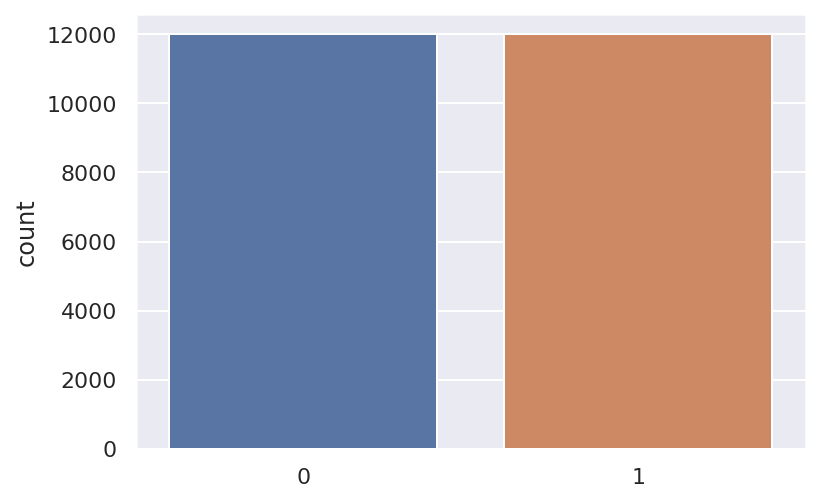

In [130]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x=odd_even_label_train)

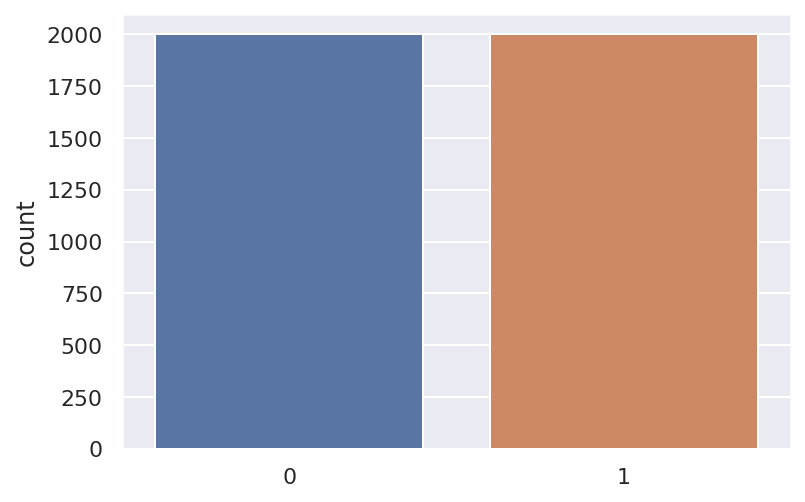

In [131]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x=odd_even_label_test)

**VISUALIZING DATA**

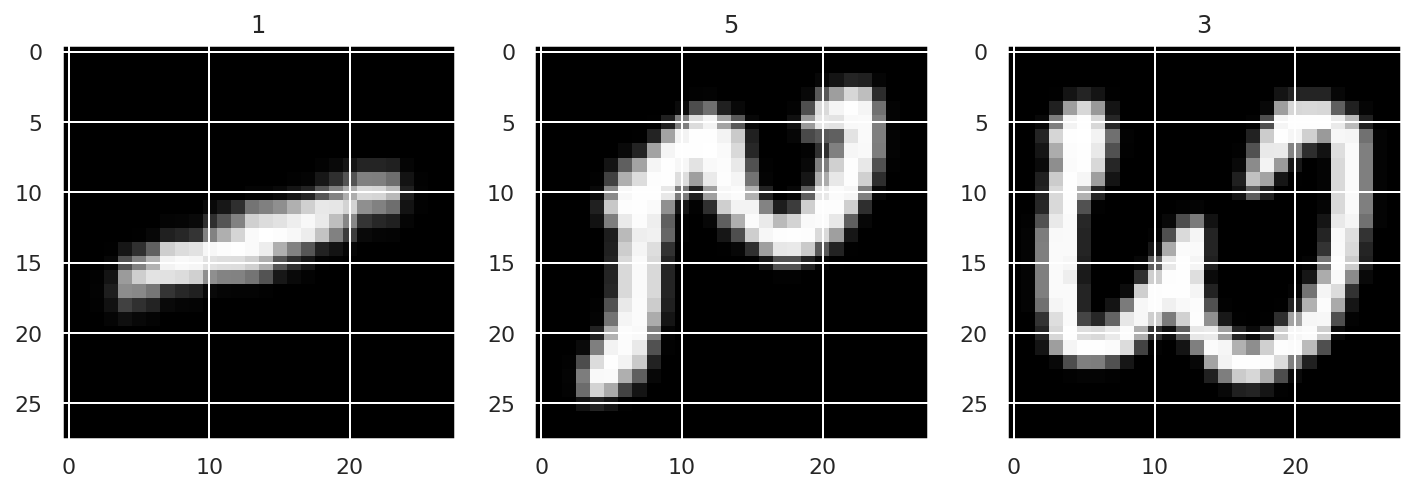

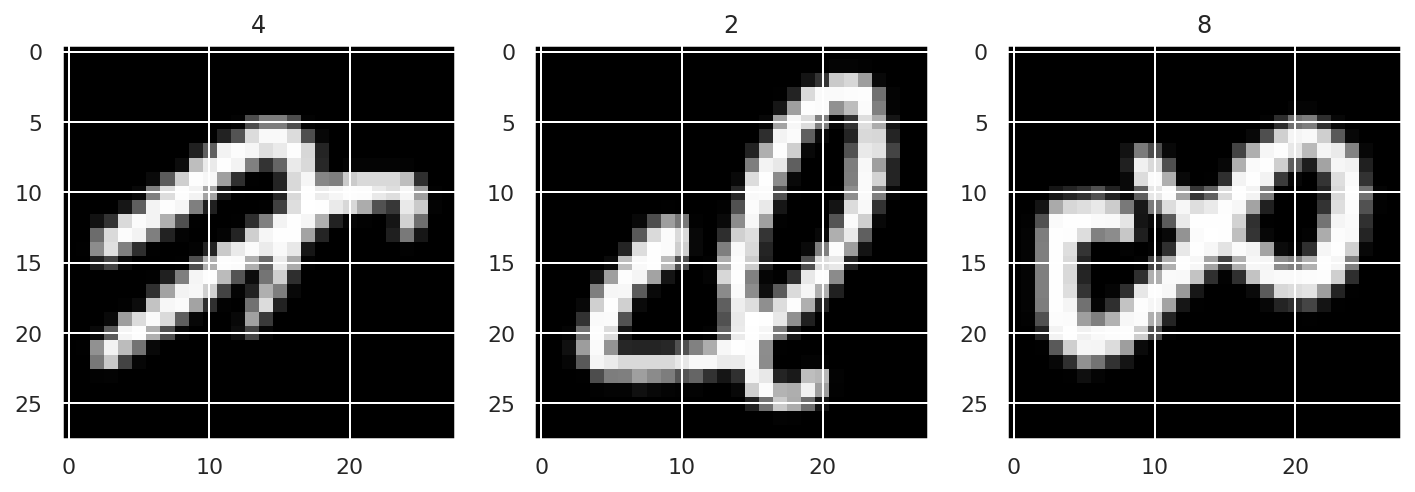

In [141]:
for i in range(2):
    index=np.where(np.array(odd_even_label_train)==i)
    images=df_prime.iloc[index].values[:3]
    titles=odd_even_df['45'].iloc[index].values[:3]
    fig,axes = plt.subplots(1, 3,figsize=(12,12))
    for j in range(3):
      axes[j].imshow(images[j].reshape(28,28), cmap='gray')
      axes[j].title.set_text(str(chr(titles[j])))

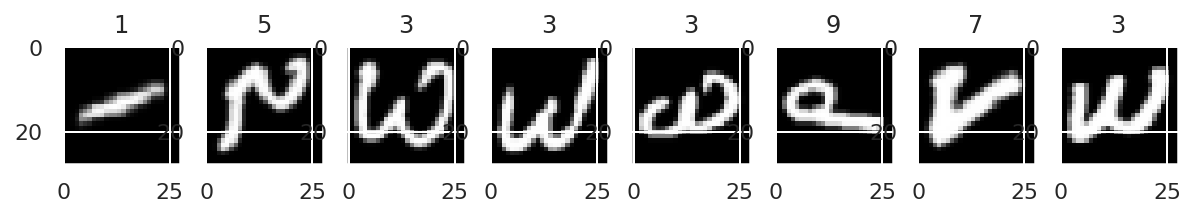

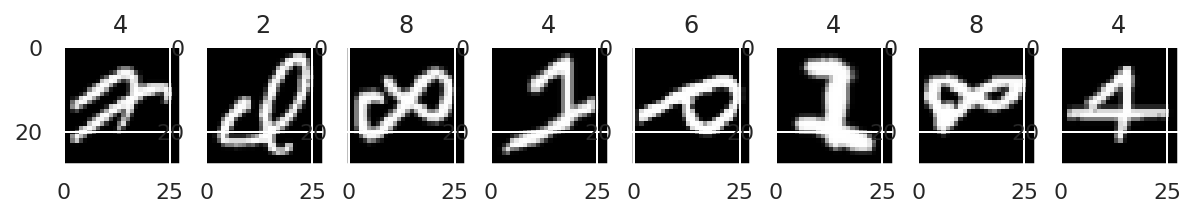

In [95]:
for i in range(2):
    index=np.where(np.array(odd_even_label_train)==i)
    images=df_prime.iloc[index].values[:8]
    titles=odd_even_df['45'].iloc[index].values[:8]
    fig,axes = plt.subplots(1, 8,figsize=(10,10))
    for j in range(8):
      axes[j].imshow(images[j].reshape(28,28), cmap='gray')
      axes[j].title.set_text(str(chr(titles[j])))

**TRAIN TEST SPLIT**

In [142]:


# input image dimensions
img_rows, img_cols = 28, 28

x_train, x_cv, y_train, y_cv= train_test_split(df_prime.values,Y,test_size=0.33,random_state=42)
x_test=df_prime_test.values


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_cv = x_cv.reshape(x_cv.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_cv = x_cv.reshape(x_cv.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_cv = x_cv.astype('float32')
x_test=x_test.astype('float32')
x_cv /= 255
x_train /= 255
x_test/=255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_cv.shape[0], 'cross-validation samples')

x_train shape: (16080, 28, 28, 1)
x_test shape: (4000, 28, 28, 1)
16080 train samples
7920 cross-validation samples


In [0]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

mcp_save = ModelCheckpoint('model_odd_even.hdf5', save_best_only=True, monitor='val_acc', mode='max')

**MODEL**

In [143]:
from keras.layers.normalization import BatchNormalization

model= Sequential()
model.add(Conv2D(128, kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape,padding='SAME'))
model.add(Conv2D(64, (3,3), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(Conv2D(32, (5,5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Conv2D(64, (5, 5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

history=model.fit(x_train,y_train,
                batch_size=128,
                epochs=15,
                verbose=1,
                validation_data=(x_cv, y_cv),callbacks=[mcp_save])

Train on 16080 samples, validate on 7920 samples
Epoch 1/15
16080/16080 [==============================] - 12s 771us/step - loss: 0.1194 - acc: 0.9582 - val_loss: 0.0500 - val_acc: 0.9861
Epoch 2/15
16080/16080 [==============================] - 3s 208us/step - loss: 0.0387 - acc: 0.9877 - val_loss: 0.1591 - val_acc: 0.9419
Epoch 3/15
16080/16080 [==============================] - 3s 206us/step - loss: 0.0314 - acc: 0.9893 - val_loss: 0.0806 - val_acc: 0.9790
Epoch 4/15
16080/16080 [==============================] - 3s 206us/step - loss: 0.0247 - acc: 0.9917 - val_loss: 0.0252 - val_acc: 0.9917
Epoch 5/15
16080/16080 [==============================] - 3s 208us/step - loss: 0.0226 - acc: 0.9925 - val_loss: 0.0477 - val_acc: 0.9871
Epoch 6/15
16080/16080 [==============================] - 3s 205us/step - loss: 0.0165 - acc: 0.9943 - val_loss: 0.0234 - val_acc: 0.9933
Epoch 7/15
16080/16080 [==============================] - 3s 209us/step - loss: 0.0134 - acc: 0.9958 - val_loss: 0.0197 - 

In [0]:
 model.load_weights('model_odd_even.hdf5') #loading the best model 

PLOTS AND RESULTS

7920/7920 [==============================] - 1s 158us/step
Test loss: 0.019035957532483737
Test accuracy: 0.99475
Train loss: 0.00671219013002788
Train accuracy: 0.9976990049751244
CV loss: 0.020536658105508348
CV accuracy: 0.9953282828282828


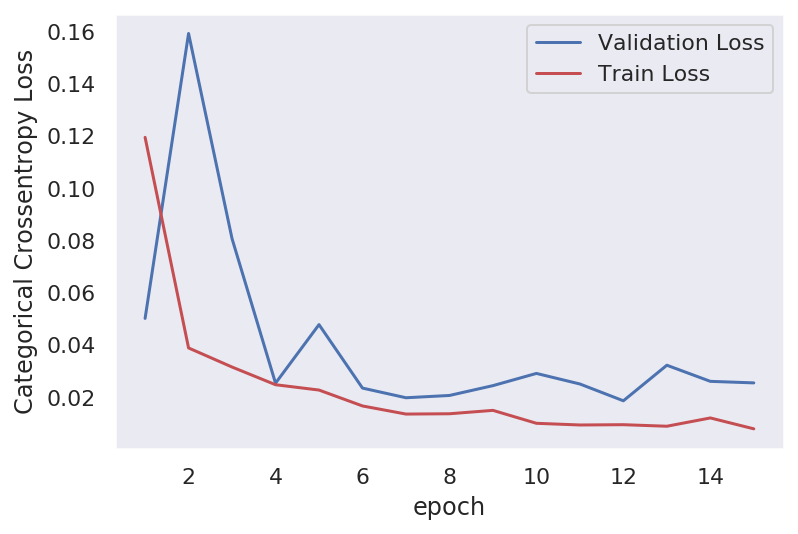

In [145]:

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

score = model.evaluate(x_test, Y_test, verbose=0) 
score_train=model.evaluate(x_train,y_train)
score_cv=model.evaluate(x_cv,y_cv)

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

print('Train loss:', score_train[0]) 
print('Train accuracy:', score_train[1])

print('CV loss:', score_cv[0]) 
print('CV accuracy:', score_cv[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,15+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
model.save("model_odd_even") # serializing the model along with weights

# **MODEL FOR DETECTING VOWELS/CONSONANTS**

**EXTRACTING COLUMNS WITH ONLY LETTERS**

In [0]:
vowel_cons_df=df_main[df_main['45']>=65].reset_index(drop=True)
vowel_cons_df_test=df_test[df_test['41']>=65].reset_index(drop=True)

In [0]:
vowel_set=['a','e','i','o','u','A','E','I','O','U']

**GETTING LABELS AS BINARY VALUES**

In [0]:
vowel_cons_label_train=[]
for value in vowel_cons_df['45'].values:
    try:
      if chr(value) in vowel_set :
          vowel_cons_label_train.append(1)
      else:
          vowel_cons_label_train.append(0)
    except:
         pass

vowel_cons_label_test=[]
for x  in vowel_cons_df_test['41'].values:
    try:
      if chr(x) in vowel_set:
          vowel_cons_label_test.append(1)
      else:
          vowel_cons_label_test.append(0)
    except:
        pass        

In [0]:
df_prime=vowel_cons_df.copy()
df_prime_test=vowel_cons_df_test.copy()

In [0]:
df_prime=df_prime.drop(['45'],axis=1)
df_prime_test=df_prime_test.drop(['41'],axis=1)

**PREPARING LABELS AS ONE HOT ENDOCED VECTORS**

In [151]:

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y= np_utils.to_categorical(vowel_cons_label_train, 2)
Y_test=np_utils.to_categorical(vowel_cons_label_test, 2)


print("After converting the output into a vector : ",Y_test[0])

After converting the output into a vector :  [0. 1.]


**CHECKING FOR CLASS IMABALANCE**

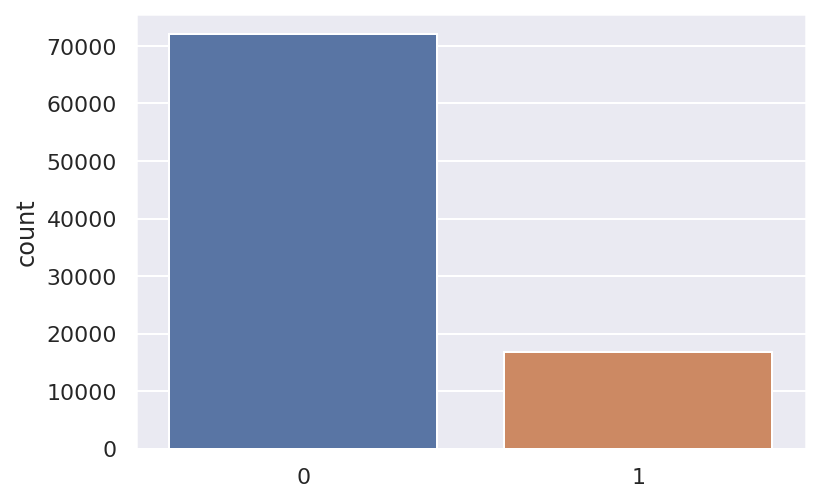

In [152]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x=vowel_cons_label_train)

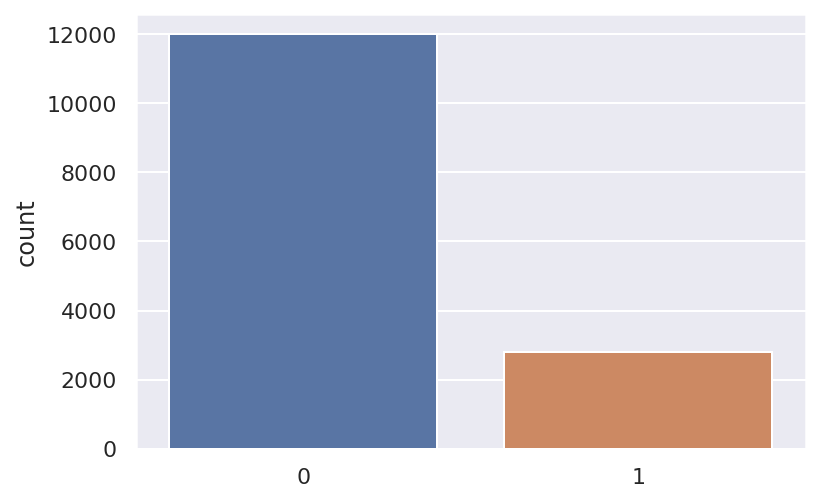

In [153]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x=vowel_cons_label_test)

**ITS A HIGHLY IMBALANCED DATASET**

# **VISUALIZING DATA**

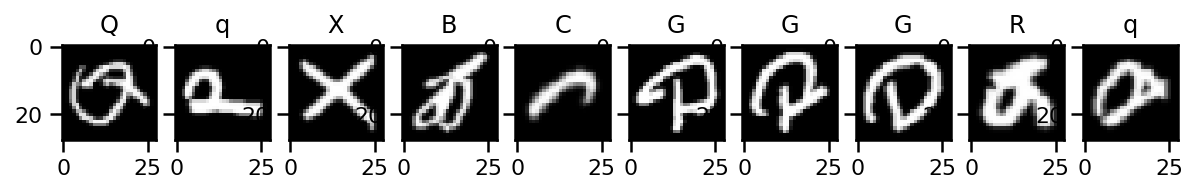

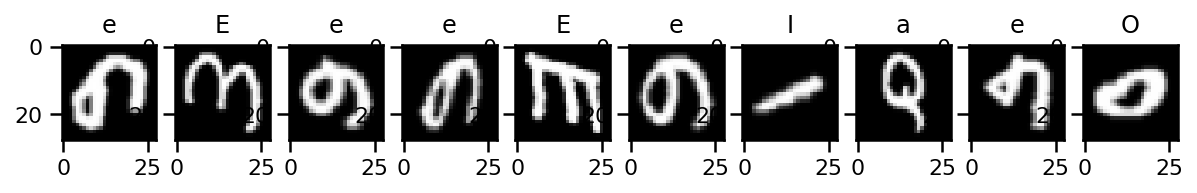

In [0]:
for i in range(2):
    index=np.where(np.array(vowel_cons_label_test)==i)
    images=df_prime_test.iloc[index].values[:10]
    titles=vowel_cons_df_test['41'].iloc[index].values[:10]
    fig,axes = plt.subplots(1, 10,figsize=(10,10))
    for j in range(10):
      axes[j].imshow(images[j].reshape(28,28), cmap='gray')
      axes[j].title.set_text(str(chr(titles[j])))
      

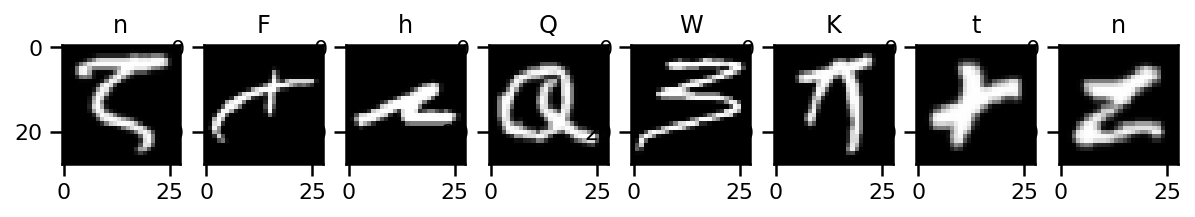

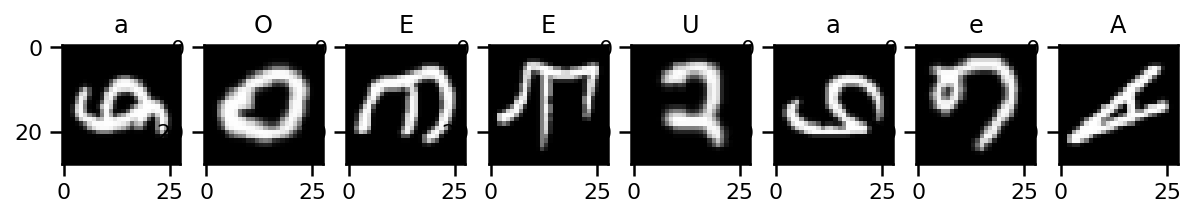

In [0]:
for i in range(2):
    index=np.where(np.array(vowel_cons_label_train)==i)
    images=df_prime.iloc[index].values[:8]
    titles=vowel_cons_df['45'].iloc[index].values[:8]
    fig,axes = plt.subplots(1, 8,figsize=(10,10))
    for j in range(8):
      axes[j].imshow(images[j].reshape(28,28), cmap='gray')
      axes[j].title.set_text(str(chr(titles[j])))

# **TRAIN - TEST SPLIT AND FORMATTING DATA**

In [154]:


# input image dimensions
img_rows, img_cols = 28, 28

x_train, x_cv, y_train, y_cv= train_test_split(df_prime.values,Y,test_size=0.33,random_state=42)
x_test=df_prime_test.values


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_cv = x_cv.reshape(x_cv.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_cv = x_cv.reshape(x_cv.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_cv = x_cv.astype('float32')
x_test=x_test.astype('float32')
x_cv /= 255
x_train /= 255
x_test/=255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_cv.shape[0], 'cross-validation samples')

x_train shape: (59495, 28, 28, 1)
x_test shape: (14799, 28, 28, 1)
59495 train samples
29304 cross-validation samples


**USING CLASS_WEIGHTS TO COUNTER CLASS IMBALANCE**

In [0]:

from sklearn.utils import class_weight
y_ints = [y.argmax() for y in y_train]
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_ints)

In [0]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_vowel_cons.hdf5', save_best_only=True, monitor='val_acc', mode='max')

**MODEL**

In [156]:
from keras.layers.normalization import BatchNormalization

model= Sequential()
model.add(Conv2D(128, kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape,padding='SAME'))
model.add(Conv2D(64, (3,3), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(Conv2D(32, (5,5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Conv2D(64, (5, 5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=128,
          class_weight=class_weights,
          epochs=15,
          verbose=1,
          validation_data=(x_cv, y_cv),callbacks=[mcp_save])

Train on 59495 samples, validate on 29304 samples
Epoch 1/15
59495/59495 [==============================] - 22s 371us/step - loss: 0.3292 - acc: 0.8709 - val_loss: 0.1582 - val_acc: 0.9342
Epoch 2/15
59495/59495 [==============================] - 12s 208us/step - loss: 0.1339 - acc: 0.9466 - val_loss: 0.0973 - val_acc: 0.9598
Epoch 3/15
59495/59495 [==============================] - 12s 208us/step - loss: 0.1031 - acc: 0.9585 - val_loss: 0.0929 - val_acc: 0.9613
Epoch 4/15
59495/59495 [==============================] - 12s 208us/step - loss: 0.0902 - acc: 0.9640 - val_loss: 0.0750 - val_acc: 0.9709
Epoch 5/15
59495/59495 [==============================] - 12s 208us/step - loss: 0.0816 - acc: 0.9678 - val_loss: 0.0763 - val_acc: 0.9697
Epoch 6/15
59495/59495 [==============================] - 12s 209us/step - loss: 0.0737 - acc: 0.9700 - val_loss: 0.0816 - val_acc: 0.9671
Epoch 7/15
59495/59495 [==============================] - 12s 209us/step - loss: 0.0726 - acc: 0.9701 - val_loss: 0.

In [0]:
model.load_weights("model_vowel_cons")

In [62]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 28, 28, 64)        73792     
_________________________________________________________________
batch_normalization_78 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 27, 27, 32)        51232     
_________________________________________________________________
batch_normalization_79 (Batc (None, 27, 27, 32)        128       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 13, 13, 32)      

## **PLOT AND RESULTS**

29304/29304 [==============================] - 5s 163us/step
Test loss: 0.07397996356767556
Test accuracy: 0.972362997499831
Train loss: 0.045407581085349986
Train accuracy: 0.9815614757542651
CV loss: 0.07022251497308078
CV accuracy: 0.9726999726999727


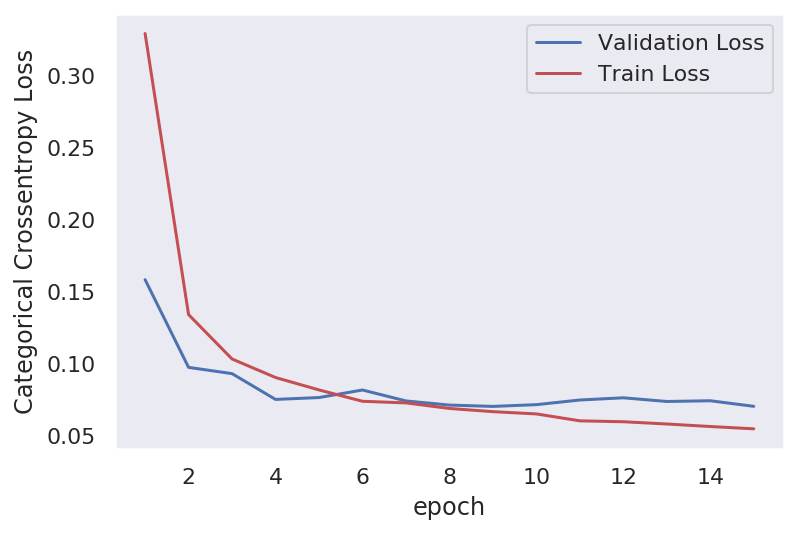

In [162]:

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

score = model.evaluate(x_test, Y_test, verbose=0) 
score_train=model.evaluate(x_train,y_train)
score_cv=model.evaluate(x_cv,y_cv)

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

print('Train loss:', score_train[0]) 
print('Train accuracy:', score_train[1])

print('CV loss:', score_cv[0]) 
print('CV accuracy:', score_cv[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,15+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
model.save("model_vowel_cons")

## **COMPLETE PIPELINE**

In [0]:
from keras.models import load_model

In [0]:
even=1
odd=0

vowel=1
consonants=0

letter=1
digit=0

even=1
odd=0

#loading all the models
model_letter_digit=load_model("model_task_1")
model_odd_even=load_model("model_odd_even")
model_vowel_cons=load_model("model_vowel_cons")

In [0]:
def app(data):

      plt.imshow(data.reshape(28,28), cmap='gray')
      plt.axis('off')

      data = data.reshape(1, 28, 28,1)
      
      prediction_1=model_letter_digit.predict(data)
      
      if (np.argmax(prediction_1))==letter:

            prediction_2=np.argmax(model_vowel_cons.predict(data))
            
            if prediction_2==vowel:

              print("This is a vowel")

            else:
              
              print("This is a consonant") 

      else:

            prediction_2=np.argmax(model_odd_even.predict(data))
            
            if prediction_2==even:

              print("This is a even digit")

            else:

              print("This is a odd digit")  


      






      



This is a odd digit


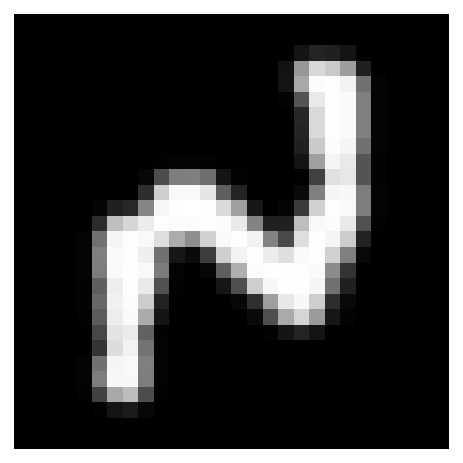

In [189]:
app(df_prime_test.iloc[12,:].values)

# **CONCLUSIONS:**

1.For classifying odd and even digits we use a 5 layered CNN architectures while we use 6 layerd architecture for classifying vowel and consonants

2.We see that the dataset is unbalanced where consonants are dominating the vowels by alot and thus to remove this biasness we use class_weights.

3.To prevent overfitting we use dropout > 0.6 and reduce the number of convolutional layers.

4.Experimented with various learning rate techiniques such as Cyclic learning rates,ReduceonPleatea,and Optimizers and got best results with Adadelta.

5.Use of bactch normalization for smooth training and better results.

6.Introducing Maxpooling layers

7.Finally we load all the three models model_task_1 for classifying into digit/letter,model_odd_even for classifying odd/even and model_vowel_cons for classifying vowel/consonants


In [192]:
from prettytable import PrettyTable
    


x = PrettyTable()

x.field_names = ["Model","Data","Loss", "Accuracy In %"]

x.add_row(["model_odd_even","Test",0.019035957532483737,0.99475])

x.add_row(["model_odd_even","Train",0.00671219013002788,0.9976990049751244])

x.add_row(["model_odd_even","CV",0.020536658105508348,0.9953282828282828])

x.add_row(["model_vowel_consonant","Test",0.07397996356767556,0.972362997499831])

x.add_row(["model_vowel_consonant","Train",0.045407581085349986,0.9815614757542651])

x.add_row(["model_vowel_consonant","CV",0.07022251497308078,0.9726999726999727])

print(x)

+-----------------------+-------+----------------------+--------------------+
|         Model         |  Data |         Loss         |   Accuracy In %    |
+-----------------------+-------+----------------------+--------------------+
|     model_odd_even    |  Test | 0.019035957532483737 |      0.99475       |
|     model_odd_even    | Train | 0.00671219013002788  | 0.9976990049751244 |
|     model_odd_even    |   CV  | 0.020536658105508348 | 0.9953282828282828 |
| model_vowel_consonant |  Test | 0.07397996356767556  | 0.972362997499831  |
| model_vowel_consonant | Train | 0.045407581085349986 | 0.9815614757542651 |
| model_vowel_consonant |   CV  | 0.07022251497308078  | 0.9726999726999727 |
+-----------------------+-------+----------------------+--------------------+
